In [19]:
import pandas as pd

mot17 = pd.read_csv('/home/hbvision/mirsaid/LITE/datasets/mot17.csv')
mot20 = pd.read_csv('/home/hbvision/mirsaid/LITE/datasets/mot20.csv')

mot17.insert(0, 'dataset', 'MOT17')
mot20.insert(0, 'dataset', 'MOT20')

mot17['density'] = mot17.groupby(['video', 'frame_number'])['track_ids'].transform('count')
mot20['density'] = mot20.groupby(['video', 'frame_number'])['track_ids'].transform('count')

mot_combined = pd.concat([mot17[mot17['resolution']==1280], mot20[mot20['resolution']==1280]], ignore_index=True)
mot_combined

,dataset,video,track_ids,frame_number,heights,scales,confs,resolution,density
0,MOT17,MOT17-13-FRCNN,5,2,104.63,0.081742,0.78,1280,129
1,MOT17,MOT17-13-FRCNN,11,2,73.08,0.057094,0.59,1280,129
2,MOT17,MOT17-13-FRCNN,3,2,115.42,0.090172,0.86,1280,129
3,MOT17,MOT17-13-FRCNN,2,2,118.55,0.092617,0.86,1280,129
4,MOT17,MOT17-13-FRCNN,7,2,74.81,0.058445,0.74,1280,129
...,...,...,...,...,...,...,...,...,...
740227,MOT20,MOT20-05,8441,3314,138.33,0.108070,0.06,1280,703
740228,MOT20,MOT20-05,7955,3314,96.62,0.075484,0.12,1280,703
740229,MOT20,MOT20-05,5280,3314,158.65,0.123945,0.34,1280,703
740230,MOT20,MOT20-05,7968,3314,139.40,0.108906,0.09,1280,703


In [20]:
den = mot_combined.groupby(['dataset', 'video', 'frame_number', 'density']).agg({
    'confs': 'mean',
    'scales': 'mean'
}).reset_index()
den

,dataset,video,frame_number,density,confs,scales
0,MOT17,MOT17-02-FRCNN,2,98,0.603333,0.131090
1,MOT17,MOT17-02-FRCNN,3,99,0.650000,0.136222
2,MOT17,MOT17-02-FRCNN,4,99,0.605714,0.128472
3,MOT17,MOT17-02-FRCNN,5,103,0.604375,0.128507
4,MOT17,MOT17-02-FRCNN,6,106,0.608000,0.133884
...,...,...,...,...,...,...
14217,MOT20,MOT20-05,3310,665,0.246265,0.111361
14218,MOT20,MOT20-05,3311,672,0.254643,0.111587
14219,MOT20,MOT20-05,3312,683,0.243810,0.111429
14220,MOT20,MOT20-05,3313,701,0.241573,0.111633


In [21]:
tracker_count_per_frame = mot_combined.groupby(['dataset', 'video', 'frame_number']).agg({'track_ids': 'count'}).reset_index()
tracker_count_per_frame

,dataset,video,frame_number,track_ids
0,MOT17,MOT17-02-FRCNN,2,12
1,MOT17,MOT17-02-FRCNN,3,11
2,MOT17,MOT17-02-FRCNN,4,14
3,MOT17,MOT17-02-FRCNN,5,16
4,MOT17,MOT17-02-FRCNN,6,15
...,...,...,...,...
14217,MOT20,MOT20-05,3310,83
14218,MOT20,MOT20-05,3311,84
14219,MOT20,MOT20-05,3312,84
14220,MOT20,MOT20-05,3313,89


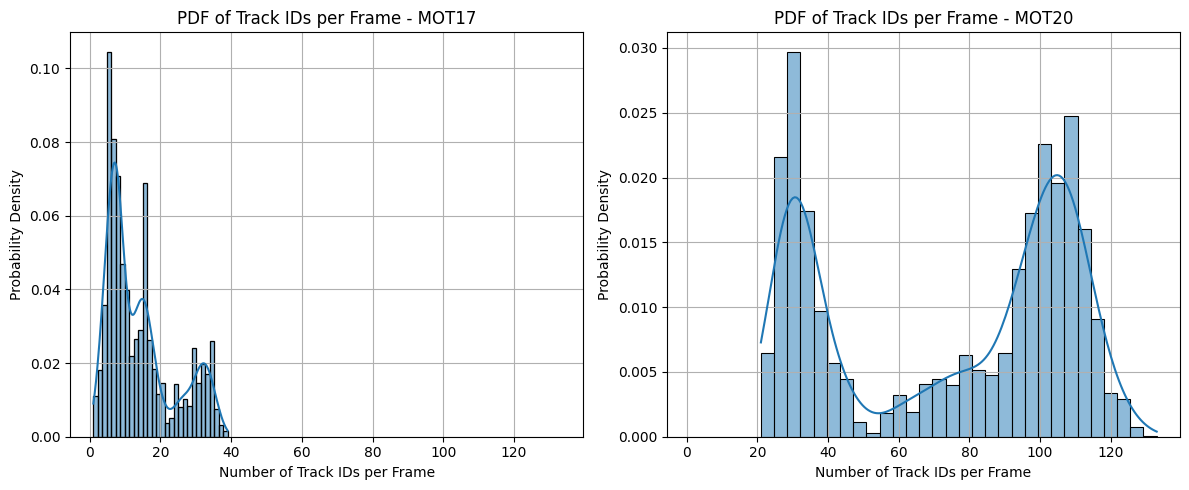

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for MOT17 and MOT20 datasets
datasets = ["MOT17", "MOT20"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot PDFs for each dataset separately
for i, dataset in enumerate(datasets):
    subset = tracker_count_per_frame[tracker_count_per_frame["dataset"] == dataset]
    
    sns.histplot(
        data=subset,
        x="track_ids",
        stat="density",
        bins=30,
        kde=True,
        ax=axes[i]
    )
    
    axes[i].set_title(f"PDF of Track IDs per Frame - {dataset.upper()}")
    axes[i].set_xlabel("Number of Track IDs per Frame")
    axes[i].set_ylabel("Probability Density")
    axes[i].grid()

plt.tight_layout()
plt.show()

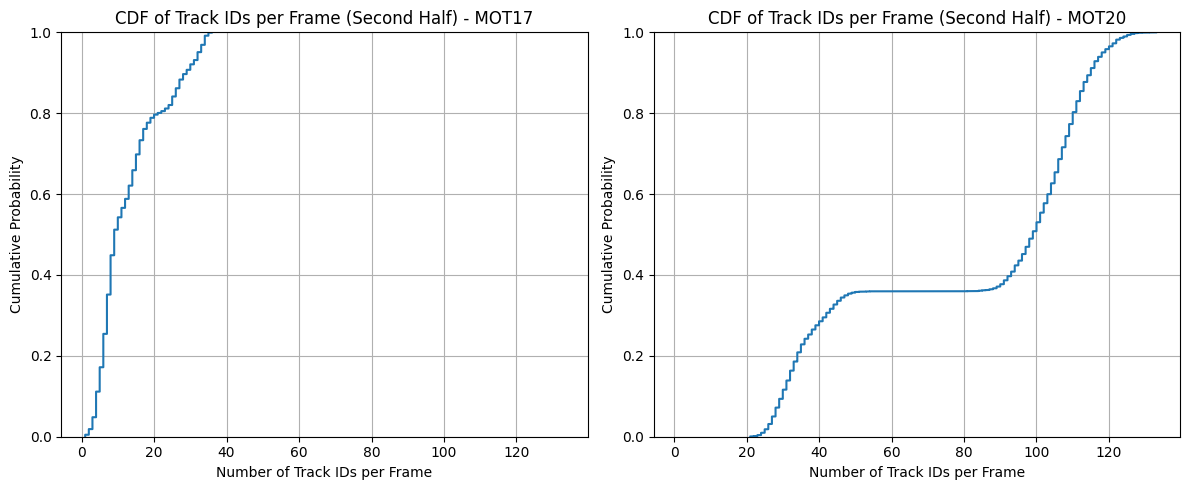

In [23]:
tracker_count_per_frame["max_frame"] = tracker_count_per_frame.groupby("video")["frame_number"].transform("max")
second_half_df = tracker_count_per_frame[tracker_count_per_frame["frame_number"] > tracker_count_per_frame["max_frame"] / 2]

# Filter datasets
datasets = ["MOT17", "MOT20"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot CDF for each dataset
for i, dataset in enumerate(datasets):
    subset = second_half_df[second_half_df["dataset"] == dataset]
    
    sns.ecdfplot(
        data=subset,
        x="track_ids",
        ax=axes[i]
    )
    
    axes[i].set_title(f"CDF of Track IDs per Frame (Second Half) - {dataset.upper()}")
    axes[i].set_xlabel("Number of Track IDs per Frame")
    axes[i].set_ylabel("Cumulative Probability")
    axes[i].grid()

plt.tight_layout()
plt.show()